In [14]:
#Tackle Noise with Error Correction

In [1]:
!pip install qiskit
!pip install qiskit-aer


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [3]:
from qiskit_aer.noise import NoiseModel ,depolarizing_error





In [4]:
qc=QuantumCircuit(3,3)

qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2],[0,1,2])
qc.draw()

┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2

In [5]:
noise_model=NoiseModel()

In [6]:
# Add depolarizing noise for single-qubit gates and two-qubit gates
depol_1q = depolarizing_error(0.01, 1)
depol_2q = depolarizing_error(0.02, 2)
noise_model.add_all_qubit_quantum_error(depol_1q, ['u3', 'x', 'h'])
noise_model.add_all_qubit_quantum_error(depol_2q, ['cx'])

In [7]:
# Use AerSimulator and noise model for simulation
backend = AerSimulator()

In [8]:
# Execute the quantum circuit with noise model
result_with_noise = backend.run(qc,noise_model=noise_model, shots=1024).result()

In [9]:
# Get the raw counts with noise
noisy_counts = result_with_noise.get_counts(qc)

In [10]:
# Simple mitigation technique: scale counts based on expected noise
mitigated_counts = {key: noisy_counts[key] * (1 - 0.02) for key in noisy_counts}

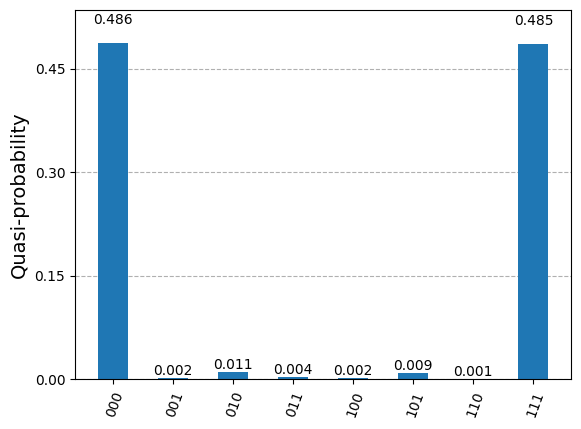

In [11]:
# Plot the mitigated results
plot_histogram(mitigated_counts)

In [12]:
print("Original counts:")
print(noisy_counts)

Original counts:
{'111': 497, '010': 11, '000': 498, '100': 2, '110': 1, '011': 4, '101': 9, '001': 2}


In [13]:
print("Mitigated counts:")
print(mitigated_counts)

Mitigated counts:
{'111': 487.06, '010': 10.78, '000': 488.03999999999996, '100': 1.96, '110': 0.98, '011': 3.92, '101': 8.82, '001': 1.96}


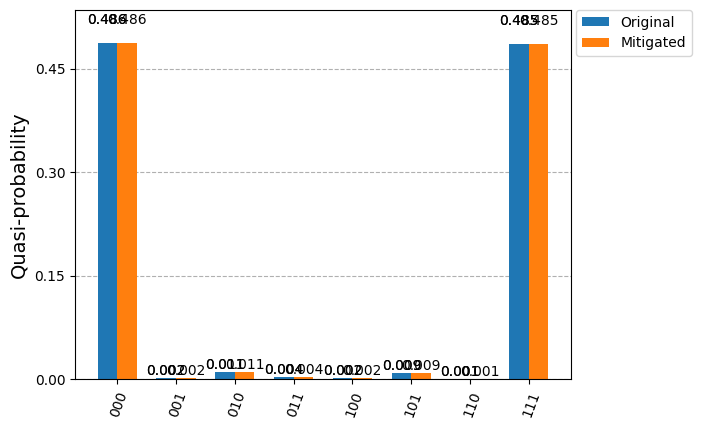

In [14]:
plot_histogram([noisy_counts, mitigated_counts], legend=['Original', 'Mitigated'])